In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

Fetching Data from Airtable

In [2]:
cookies = {
    'brw': 'brws4IR7PG3tmXvrO',
    '__Host-airtable-session': 'eyJzZXNzaW9uSWQiOiJzZXNRUHh1aEJRdFl1dTJ4cSIsImNzcmZTZWNyZXQiOiI1Si0xMDRJcDdjMi1MLTFOLU04WlpudlQifQ==',
    '__Host-airtable-session.sig': 'Eb6cNTgTxtI-xyXXRe5AWFrlqo4pRGeY7g5-QhraB6U',
    'AWSALB': 'OH18bfY+BnZbUdtXUlV+CkWCmVuq8YP/M6iRSId7Lxf4ycBoVHtPVfBPpfnHBpwHQBIU9yEly3kYvTjJMvOZ5usvqhG9k97vs0wIvYIgeAM3N2/zNEEdCdzjOsXA',
    'AWSALBCORS': 'OH18bfY+BnZbUdtXUlV+CkWCmVuq8YP/M6iRSId7Lxf4ycBoVHtPVfBPpfnHBpwHQBIU9yEly3kYvTjJMvOZ5usvqhG9k97vs0wIvYIgeAM3N2/zNEEdCdzjOsXA',
}

headers = {
    'authority': 'airtable.com',
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9',
    # 'cookie': 'brw=brws4IR7PG3tmXvrO; __Host-airtable-session=eyJzZXNzaW9uSWQiOiJzZXNRUHh1aEJRdFl1dTJ4cSIsImNzcmZTZWNyZXQiOiI1Si0xMDRJcDdjMi1MLTFOLU04WlpudlQifQ==; __Host-airtable-session.sig=Eb6cNTgTxtI-xyXXRe5AWFrlqo4pRGeY7g5-QhraB6U; AWSALB=OH18bfY+BnZbUdtXUlV+CkWCmVuq8YP/M6iRSId7Lxf4ycBoVHtPVfBPpfnHBpwHQBIU9yEly3kYvTjJMvOZ5usvqhG9k97vs0wIvYIgeAM3N2/zNEEdCdzjOsXA; AWSALBCORS=OH18bfY+BnZbUdtXUlV+CkWCmVuq8YP/M6iRSId7Lxf4ycBoVHtPVfBPpfnHBpwHQBIU9yEly3kYvTjJMvOZ5usvqhG9k97vs0wIvYIgeAM3N2/zNEEdCdzjOsXA',
    'sec-ch-ua': '"Not.A/Brand";v="8", "Chromium";v="114", "Google Chrome";v="114"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Linux"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin',
    'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36',
    'x-airtable-accept-msgpack': 'true',
    'x-airtable-application-id': 'app1PaujS9zxVGUZ4',
    'x-airtable-inter-service-client': 'webClient',
    'x-airtable-page-load-id': 'pglnZSPrKLVpejLkB',
    'x-early-prefetch': 'true',
    'x-requested-with': 'XMLHttpRequest',
    'x-time-zone': 'Asia/Calcutta',
    'x-user-locale': 'en',
}

response = requests.get(
    'https://airtable.com/v0.3/view/viwA14Z1pM69YIsaW/readSharedViewData?stringifiedObjectParams=%7B%22shouldUseNestedResponseFormat%22%3Atrue%7D&requestId=reqUKaKp1yFTu4Hu3&accessPolicy=%7B%22allowedActions%22%3A%5B%7B%22modelClassName%22%3A%22view%22%2C%22modelIdSelector%22%3A%22viwA14Z1pM69YIsaW%22%2C%22action%22%3A%22readSharedViewData%22%7D%2C%7B%22modelClassName%22%3A%22view%22%2C%22modelIdSelector%22%3A%22viwA14Z1pM69YIsaW%22%2C%22action%22%3A%22getMetadataForPrinting%22%7D%2C%7B%22modelClassName%22%3A%22view%22%2C%22modelIdSelector%22%3A%22viwA14Z1pM69YIsaW%22%2C%22action%22%3A%22readSignedAttachmentUrls%22%7D%2C%7B%22modelClassName%22%3A%22row%22%2C%22modelIdSelector%22%3A%22rows%20*%5BdisplayedInView%3DviwA14Z1pM69YIsaW%5D%22%2C%22action%22%3A%22createDocumentPreviewSession%22%7D%5D%2C%22shareId%22%3A%22shrqYt5kSqMzHV9R5%22%2C%22applicationId%22%3A%22app1PaujS9zxVGUZ4%22%2C%22generationNumber%22%3A0%2C%22expires%22%3A%222023-08-03T00%3A00%3A00.000Z%22%2C%22signature%22%3A%22d36fea90ab277d1b4ed9f74e2f256c91bc34848c662dad331cc955dc788924d4%22%7D',
    cookies=cookies,
    headers=headers,
)

In [3]:
jsonData = response.json()

In [4]:
table = jsonData.get("data","").get("table")

In [5]:
columns = table.get("columns","")

In [6]:
mappingDict = dict()
for column in columns:
    id = column["id"]
    name = column["name"]
    mappingDict[id] = name
    if "typeOptions" in column:
        try:
            typeOptions = column.get("typeOptions")
            choices = typeOptions.get("choices")
            for key,value in choices.items():
                mappingDict[value["id"]] = value["name"]
        except:
            pass

In [7]:
rows= table.get("rows","")

Analysing Data Available in json response and identifying values of it like country from countrycode etc

In [8]:
dataLst =[]
for row in rows:
    cellValuesByColumnId = row["cellValuesByColumnId"]
    interdict = dict()
    for d,k in cellValuesByColumnId.items():
        interdict[mappingDict[d]] = k
    dataLst.append(interdict)

Creating DataFrame

In [9]:
df = pd.DataFrame(dataLst)

In [10]:
df.head()

,Company,Location HQ,Industry,Date,Source,$ Raised (mm),Stage,Date Added,Country,# Laid Off,%,List of Employees Laid Off
0,Code42,[selB67XnFfugyCbCy],selOiyle68RTVF1rX,2023-07-17T00:00:00.000Z,https://blocksandfiles.com/2023/07/17/data-los...,137.0,selRkNOUKADWhjDVg,2023-07-17T22:38:28.000Z,seldVNXmT64IJdbP2,NaN,NaN,NaN
1,Binance,[sel3bA6y4VBmZMWko],selLJkLp5cw09tKhF,2023-07-14T00:00:00.000Z,https://www.wsj.com/articles/binance-lays-off-...,NaN,selRkNOUKADWhjDVg,2023-07-14T18:27:29.000Z,selisT1QTCLbKHlS2,1000.0,NaN,NaN
2,PayScale,[selUIARvta4ZrMQ4S],selZq6RloLnGETcqq,2023-07-14T00:00:00.000Z,https://www.bizjournals.com/seattle/news/2023/...,33.0,selEPnLyx1vpTXoMi,2023-07-15T03:40:15.000Z,seldVNXmT64IJdbP2,14.0,0.02,NaN
3,Navi Technologies,"[selwgWRJpOwx2s1A9, sel8GpsCiYX4oM0Yl]",seluHafT4M09jrLuo,2023-07-13T00:00:00.000Z,https://economictimes.indiatimes.com/tech/star...,659.0,selRkNOUKADWhjDVg,2023-07-13T03:42:21.000Z,selXARwGJXy8DB6KI,200.0,NaN,NaN
4,Skill Lync,"[sel1JO3CBheVBVjsw, sel8GpsCiYX4oM0Yl]",sel6OGZcQaNaIy01j,2023-07-13T00:00:00.000Z,https://entrackr.com/2023/07/edtech-company-sk...,17.0,seljXqXvNGlbMKwqs,2023-07-13T18:29:00.000Z,selXARwGJXy8DB6KI,200.0,NaN,NaN


In [11]:
def identifyValues(text):
    try:
        if isinstance(text,list):
            return list(map(lambda x:mappingDict[x],text))
        else:
            return mappingDict[text]
    except:
        return ''

In [12]:
df.columns

Index(['Company', 'Location HQ', 'Industry', 'Date', 'Source', '$ Raised (mm)',
       'Stage', 'Date Added', 'Country', '# Laid Off', '%',
       'List of Employees Laid Off'],
      dtype='object')

In [13]:
df.shape  #Number of Layoffs happened till today

(2831, 12)

In [14]:
df["Industry"] = df["Industry"].apply(identifyValues)

In [15]:
df["Stage"] = df["Stage"].apply(identifyValues)

In [16]:
df["Country"] = df["Country"].apply(identifyValues)

In [17]:
df["Location HQ"] = df["Location HQ"].apply(identifyValues)

In [18]:
df.head()

,Company,Location HQ,Industry,Date,Source,$ Raised (mm),Stage,Date Added,Country,# Laid Off,%,List of Employees Laid Off
0,Code42,[Minneapolis],Security,2023-07-17T00:00:00.000Z,https://blocksandfiles.com/2023/07/17/data-los...,137.0,Unknown,2023-07-17T22:38:28.000Z,United States,NaN,NaN,NaN
1,Binance,[Cayman Islands],Crypto,2023-07-14T00:00:00.000Z,https://www.wsj.com/articles/binance-lays-off-...,NaN,Unknown,2023-07-14T18:27:29.000Z,Cayman Islands,1000.0,NaN,NaN
2,PayScale,[Seattle],HR,2023-07-14T00:00:00.000Z,https://www.bizjournals.com/seattle/news/2023/...,33.0,Acquired,2023-07-15T03:40:15.000Z,United States,14.0,0.02,NaN
3,Navi Technologies,"[Bengaluru, Non-U.S.]",Finance,2023-07-13T00:00:00.000Z,https://economictimes.indiatimes.com/tech/star...,659.0,Unknown,2023-07-13T03:42:21.000Z,India,200.0,NaN,NaN
4,Skill Lync,"[Chennai, Non-U.S.]",Education,2023-07-13T00:00:00.000Z,https://entrackr.com/2023/07/edtech-company-sk...,17.0,Series A,2023-07-13T18:29:00.000Z,India,200.0,NaN,NaN


Layoffs W.r.t Funding Stages

<Axes: xlabel='Stage'>

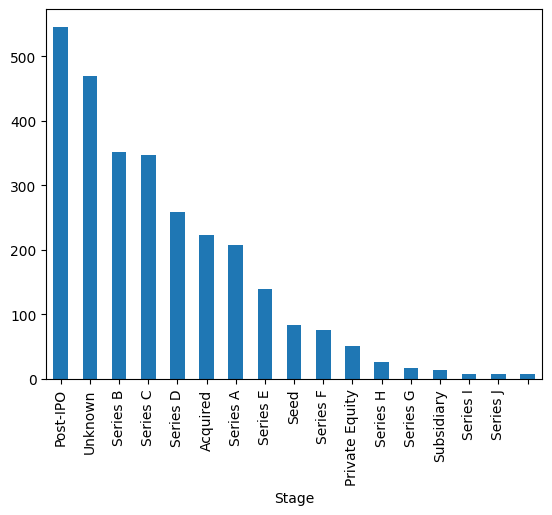

In [19]:
df["Stage"].value_counts().plot(kind="bar") 

In [20]:
def get_year(datestring):
    try:
        datestring = datestring.split("T")[0]
        dt = datetime.strptime(datestring, '%Y-%m-%d')

        return dt.year
    except:
        return 0

In [21]:
df["Year"] = df["Date"].apply(get_year)

In [22]:
def get_month(datestring):
    try:
        datestring = datestring.split("T")[0]
        dt = datetime.strptime(datestring, '%Y-%m-%d')

        return dt.month
    except:
        return 0

In [23]:
df["Month"] = df["Date"].apply(get_year)

Number of Layoffs Rounds Each year

<Axes: xlabel='Year'>

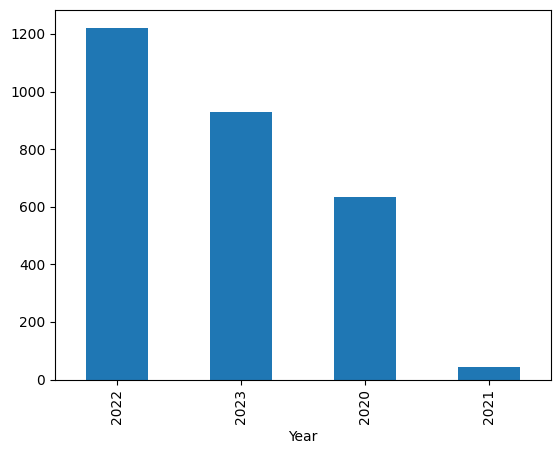

In [24]:
df["Year"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

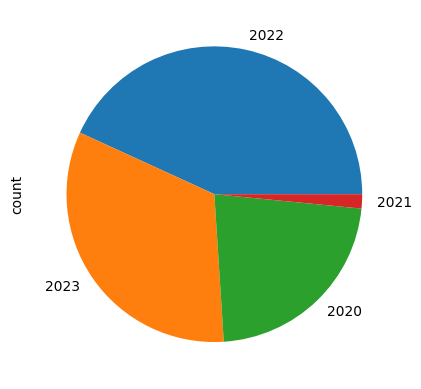

In [25]:
df["Year"].value_counts().plot(kind="pie")

Number of Peoples laid off each year

<Axes: xlabel='Year'>

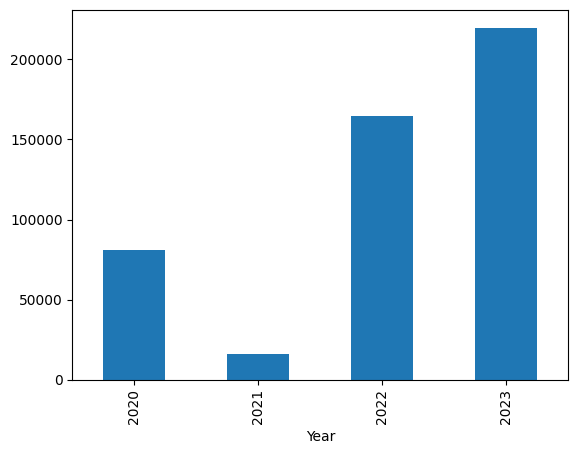

In [26]:
df.groupby(["Year"])["# Laid Off"].sum().plot(kind="bar")

Analysing Number of Layoffs Rounds W.R.T. Industry

<Axes: xlabel='Industry'>

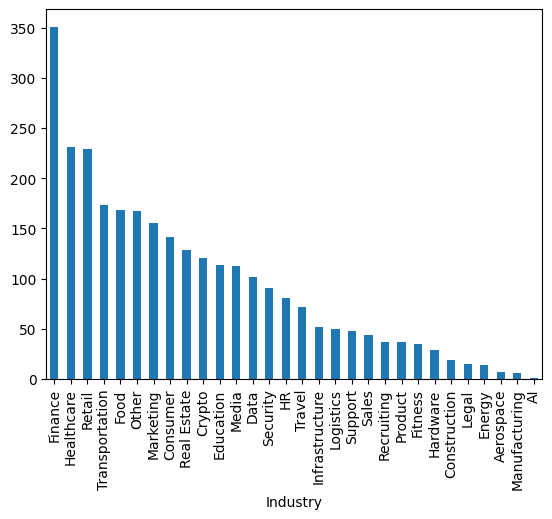

In [27]:
df["Industry"].value_counts().plot(kind="bar")

Number of Peoples Laid off Industry wise

<Axes: xlabel='Industry'>

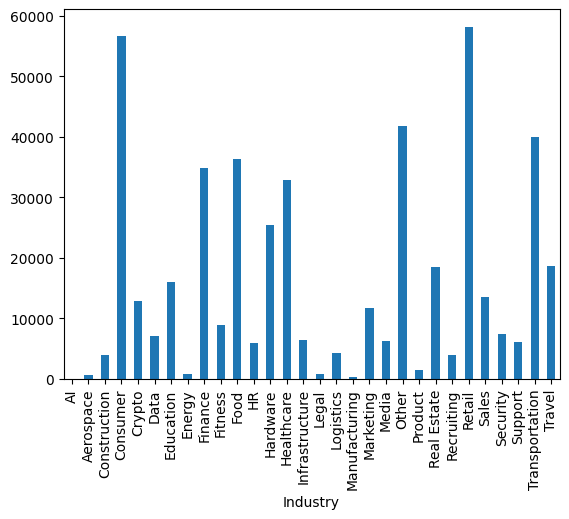

In [28]:
df.groupby(["Industry"])["# Laid Off"].sum().plot(kind="bar")

Number of Layoffs Rounds Country wise

<Axes: xlabel='Country'>

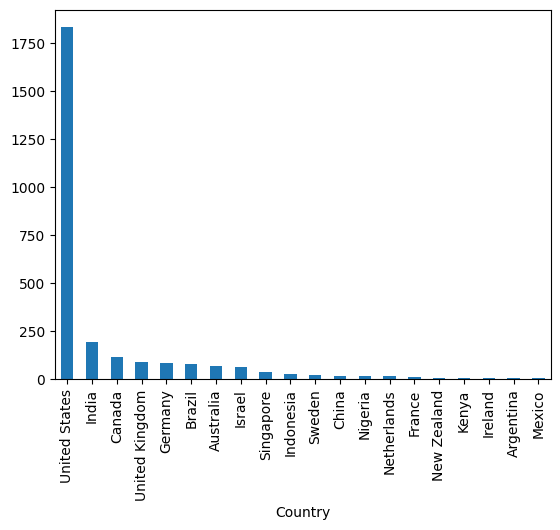

In [32]:
df["Country"].value_counts()[:20].plot(kind="bar")

<Axes: xlabel='Country'>

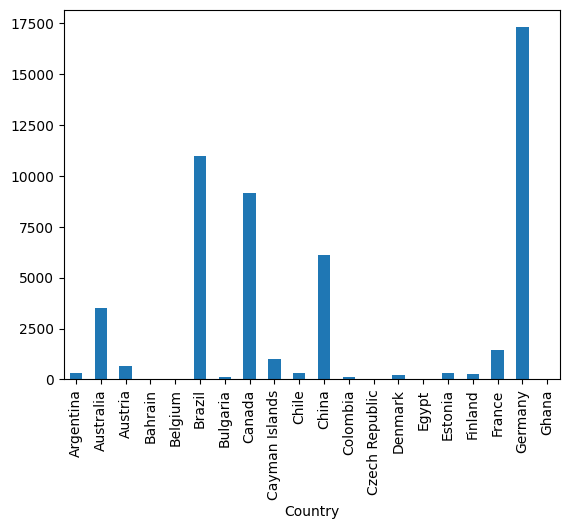

In [37]:
df.groupby(["Country"])["# Laid Off"].sum()[:20].plot(kind="bar")